### 一维数据 可视化reg tree

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from pprint import pprint
%matplotlib inline
%pprint   # use %pprint command to turn on/off pprint feature:

Pretty printing has been turned ON


### test on random.rand ~ N(0, 1)

random.rand ~ N(0, 1) 服从正态分布，通过大量采样计算mean var验证

In [8]:
x = np.random.randn(1000000)
x[:20]

array([-0.03668089,  1.56385682, -0.0162237 , -2.05450653,  0.17675336,
        1.49837701,  0.48944162,  0.1768911 ,  0.33770882, -0.89702698,
       -0.74272783, -0.64772515,  0.12976985, -0.07744156, -1.31685827,
        0.95324766,  1.38150215,  0.25861129, -0.13569582, -1.0488758 ])

In [9]:
x.mean()   # expect 0附近

-0.0017392476182030866

In [10]:
x.var()   #variance 1附近

0.9999891597567249

### generate test data

In [11]:

y_arr = np.array([])
n = 60
center = [5, 10, 15, 20]  # 以这些数值为中心生成 label: y
parts = len(center)
for c in center:
    y_arr = np.append(y_arr, np.random.randn(n//parts) + c)  # 加入一些扰动
print(y_arr)

[ 4.23795367  3.45711065  5.6139643   5.18686833  6.15287422  4.99471235
  6.48389707  5.07698536  7.31086802  6.68922718  5.33285731  5.18563434
  4.10484463  6.16492893  7.3838532  10.80751416 11.11066315  9.97391642
  9.91959492  8.37139418  9.41319806 10.85944524 10.97014876  9.97873485
 10.62285612 10.7445885  10.50910524  9.52635271  8.56687636 11.23023565
 14.03283841 15.31746141 15.67609894 15.29846968 15.73194265 16.73299021
 17.17416616 14.16150465 14.54815778 15.37504537 16.34713764 13.69882579
 14.62180845 14.5544156  15.1864149  20.46749018 20.24051464 18.8918232
 20.94489839 20.62352703 19.20131742 20.29589306 20.66093846 20.43596192
 20.50966577 22.527328   18.60528456 18.00664699 20.5114126  20.76189281]


In [12]:
x_arr = np.arange(y_arr.shape[0]) + np.random.randn(y_arr.shape[0])  # 生成 data: x
# np.random.shuffle(x_arr)
print(x_arr[:10])

[0.31915614 1.49411467 0.39295866 4.00836526 3.98601104 4.95459958
 6.06275799 5.6283386  6.32458928 8.1499016 ]


In [13]:
D = np.stack((x_arr, y_arr), axis=1)   # 用np.stack 将x, y沿axis=1合并
print(D.shape)
print(D[:10])

(60, 2)
[[0.31915614 4.23795367]
 [1.49411467 3.45711065]
 [0.39295866 5.6139643 ]
 [4.00836526 5.18686833]
 [3.98601104 6.15287422]
 [4.95459958 4.99471235]
 [6.06275799 6.48389707]
 [5.6283386  5.07698536]
 [6.32458928 7.31086802]
 [8.1499016  6.68922718]]


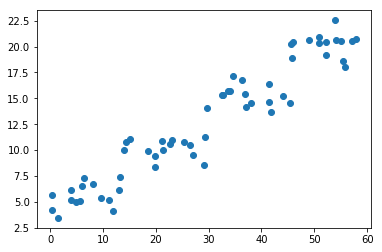

In [14]:
plt.scatter(D[:, 0], D[:, 1])

### build regression tree

In [140]:
def split_dataset(D, value):  # dataset, splitting value
    '''
    根据 value 将D 划分为 >, <= 两部分
    '''
    D_lte = D[ D[:, 0] <= value ]
    D_gt = D[ D[:, 0] > value]
#     if not np.any(D_lte):
#         D_lte = None
#     if not np.any(D_gt):
#         D_gt = None
    return D_lte, D_gt
    

In [141]:
# split_dataset(D, 0)
# dir(split_dataset)
# print(split_dataset.__doc__)

In [142]:
def cal_err(D):
    '''
    用平方误差度量训练误差
    '''
    if not np.any(D):  # empty array return err 0
        return 0
#     1.
#     ave = np.mean(D[:, 1])
#     return np.sum((D[:, 1] - ave)**2)
#     2.
    return np.var(D[:, 1]) * D.shape[0]   # 方差*N = sigma[(y-ave)**2]

In [143]:
# a = np.array([[1,1], [2, 4]])
# cal_err(a)

In [144]:
# cal_err(D)

In [145]:
# cal_err([])

In [146]:
# D1, D2 = split_dataset(D, 10)
# print(cal_err(D1), cal_err(D2))

In [147]:
max_depth = 3

def build_reg_tree(D, depth = 1):
#     print('-'*20)
#     print(D, depth)
    if depth == max_depth:
        if np.any(D):
            node = {'type':'end', 'value':np.mean(D[:,1])}  # 'end' node
            return node
        else:
            return None
    else:
        min_err = np.inf  # np.inf
        idx = -1
        for i in range(D.shape[0]): # try all possible split value
            D1, D2 = split_dataset(D, D[i][0])
            total_err = cal_err(D1) + cal_err(D2)  # calculate total error
            if total_err < min_err:
                min_err = total_err
                idx = i   # save best split index
                
        best_D1, best_D2 = split_dataset(D, D[idx][0])
        node = {'type':'decision', 'split_x':D[idx][0], 'lte_node':None, 'gt_node':None}
        if np.any(best_D1):
            node['lte_node'] = build_reg_tree(best_D1, depth+1)  # built tree recursively
        if np.any(best_D2):
            node['gt_node'] = build_reg_tree(best_D2, depth+1)
        return node
                

In [148]:
reg_tree = build_reg_tree(D)
pprint(reg_tree)

{'gt_node': {'gt_node': {'type': 'end', 'value': 20.17897300129773},
             'lte_node': {'type': 'end', 'value': 15.230485175476229},
             'split_x': 45.47714055303481,
             'type': 'decision'},
 'lte_node': {'gt_node': {'type': 'end', 'value': 10.173641620955868},
              'lte_node': {'type': 'end', 'value': 5.558438636629444},
              'split_x': 13.243698019426464,
              'type': 'decision'},
 'split_x': 29.394691185092935,
 'type': 'decision'}


In [149]:
def _predict_one(node, x_test):
    '''
    predict one test sample
    '''
    if node['type'] == 'decision':
        if x_test > node['split_x']:
            return _predict_one(node['gt_node'], x_test)
        else:
            return _predict_one(node['lte_node'], x_test)
    else: # 'end' node
        return node['value']
    
def predict(node, x_test_arr):
    '''
    predict multiple test samples
    x_test_arr: list or np.array
    '''
    res_list = []
    for d in x_test_arr:
        res_list.append(_predict_one(node, d))
    return np.array(res_list)

In [150]:
# plt.scatter(D[:, 0], D[:, 1])
_predict_one(reg_tree, 10)

5.558438636629444

In [153]:
predict(reg_tree, [10, 20, 30])

array([ 5.55843864, 10.17364162, 15.23048518])

In [152]:
print('predict result: ', predict(reg_tree, D[:, 0]))
print('ground truth: ', D[:, 1])

predict result:  [ 5.55843864  5.55843864  5.55843864  5.55843864  5.55843864  5.55843864
  5.55843864  5.55843864  5.55843864  5.55843864  5.55843864  5.55843864
  5.55843864  5.55843864  5.55843864 10.17364162 10.17364162 10.17364162
 10.17364162 10.17364162 10.17364162 10.17364162 10.17364162 10.17364162
 10.17364162 10.17364162 10.17364162 10.17364162 10.17364162 10.17364162
 15.23048518 15.23048518 15.23048518 15.23048518 15.23048518 15.23048518
 15.23048518 15.23048518 15.23048518 15.23048518 15.23048518 15.23048518
 15.23048518 15.23048518 15.23048518 20.178973   20.178973   20.178973
 20.178973   20.178973   20.178973   20.178973   20.178973   20.178973
 20.178973   20.178973   20.178973   20.178973   20.178973   20.178973  ]
ground truth:  [ 4.23795367  3.45711065  5.6139643   5.18686833  6.15287422  4.99471235
  6.48389707  5.07698536  7.31086802  6.68922718  5.33285731  5.18563434
  4.10484463  6.16492893  7.3838532  10.80751416 11.11066315  9.97391642
  9.91959492  8.371394

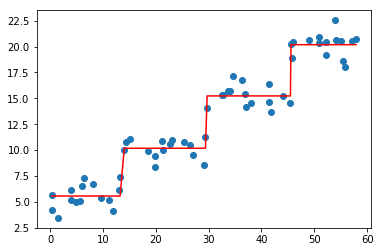

In [28]:
plt.scatter(D[:, 0], D[:, 1])

idx = np.argsort(D[:, 0])  # sort on x dim
sorted_D = D[idx, 0]
plt.plot(sorted_D, predict(reg_tree, sorted_D), c = 'r')   # draw regression line

### using sklearn 

In [103]:
from sklearn import tree

In [120]:
clf = tree.DecisionTreeRegressor()
X = D[:, 0][:, np.newaxis]
y = D[:, 1]
X_sorted = X[np.argsort(X, axis=0).flatten()]
X = X_sorted

clf.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [121]:
clf.predict([[10], [20]])

array([5.33285731, 9.41319806])

In [122]:
np.argsort(X, axis=0)[:10]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [123]:
# np.argsort(X, axis=0).flatten()

In [124]:
# X_sorted = X[np.argsort(X, axis=0).flatten()]
# print(X[:10])
# print(X_sorted[:10])

In [125]:
y_predict = clf.predict(X)
print(y_predict)

[ 4.23795367  3.45711065  5.6139643   5.18686833  6.15287422  4.99471235
  6.48389707  5.07698536  7.31086802  6.68922718  5.33285731  5.18563434
  4.10484463  6.16492893  7.3838532  10.80751416 11.11066315  9.97391642
  9.91959492  8.37139418  9.41319806 10.85944524 10.97014876  9.97873485
 10.62285612 10.7445885  10.50910524  9.52635271  8.56687636 11.23023565
 14.03283841 15.31746141 15.67609894 15.29846968 15.73194265 16.73299021
 17.17416616 14.16150465 14.54815778 15.37504537 16.34713764 13.69882579
 14.62180845 14.5544156  15.1864149  20.46749018 20.24051464 18.8918232
 20.94489839 20.62352703 19.20131742 20.29589306 20.66093846 20.43596192
 20.50966577 22.527328   18.60528456 18.00664699 20.5114126  20.76189281]


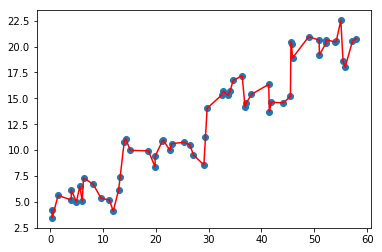

In [126]:
plt.scatter(X, y)
plt.plot(X, y_predict, c = 'r')   # we can see overfitting!!! not set maxdepth

#### solve overfitting by set maxdepth

In [137]:
clf_2 = tree.DecisionTreeRegressor(max_depth=2)
clf_2.fit(X, y)
y_predict_2 = clf_2.predict(X)

In [155]:
clf_2.predict([[10], [20], [30]])

array([ 5.55843864, 10.17364162, 15.23048518])

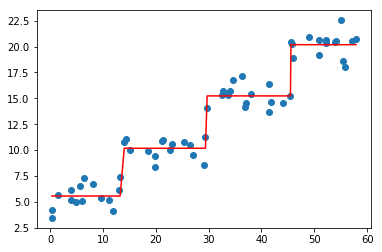

In [156]:
plt.scatter(X, y)
plt.plot(X, y_predict_2, c = 'r')   # we can see overfitting!!!

In [52]:
D[:, 0][:, np.newaxis].shape  # add one axis to fit sklearn

(60, 1)

In [42]:
D[:, 1].shape

(60,)

### some test scripts

In [58]:
idx = np.argsort(D[:, 0])
idx

array([ 0,  2,  1,  4,  3,  5,  7,  6,  8,  9, 10, 11, 12, 13, 14, 17, 15,
       16, 18, 20, 19, 21, 23, 24, 22, 25, 26, 27, 28, 29, 30, 31, 33, 32,
       34, 36, 35, 39, 37, 38, 42, 40, 41, 44, 43, 46, 47, 45, 49, 51, 48,
       50, 53, 55, 52, 54, 56, 57, 58, 59])

In [368]:
D[:, 0]

array([-1.86037252,  1.50691653,  1.88393274,  4.06419509,  4.44613241,
        5.96174756,  3.73104784,  5.56338131,  9.56090145,  8.59797104,
       10.1535902 , 11.21899052, 12.41137532, 11.53200318, 13.78502825,
       15.5983104 , 15.95425059, 16.31803705, 17.25970765, 20.16977767,
       21.7818131 , 21.98159192, 23.42237155, 24.4410363 , 24.72374391,
       26.00863623, 26.59440272, 28.52582771, 28.69501969, 30.16271135,
       27.9281809 , 30.43995263, 32.09415621, 32.65468438, 34.92279881,
       35.95038056, 34.69715182, 36.64284096, 39.0282341 , 38.19997659,
       37.79263367, 40.21303592, 41.70453983, 42.58850998, 42.93177377,
       44.98045106, 45.7041293 , 48.18728439, 48.43049799, 47.14175859,
       50.06817429, 51.42866742, 52.83366002, 53.9309659 , 55.33649674,
       55.33643516, 54.32260235, 57.66816933, 58.20367469, 58.76930758])

In [369]:
D[idx, 0]

array([-1.86037252,  1.50691653,  1.88393274,  3.73104784,  4.06419509,
        4.44613241,  5.56338131,  5.96174756,  8.59797104,  9.56090145,
       10.1535902 , 11.21899052, 11.53200318, 12.41137532, 13.78502825,
       15.5983104 , 15.95425059, 16.31803705, 17.25970765, 20.16977767,
       21.7818131 , 21.98159192, 23.42237155, 24.4410363 , 24.72374391,
       26.00863623, 26.59440272, 27.9281809 , 28.52582771, 28.69501969,
       30.16271135, 30.43995263, 32.09415621, 32.65468438, 34.69715182,
       34.92279881, 35.95038056, 36.64284096, 37.79263367, 38.19997659,
       39.0282341 , 40.21303592, 41.70453983, 42.58850998, 42.93177377,
       44.98045106, 45.7041293 , 47.14175859, 48.18728439, 48.43049799,
       50.06817429, 51.42866742, 52.83366002, 53.9309659 , 54.32260235,
       55.33643516, 55.33649674, 57.66816933, 58.20367469, 58.76930758])

In [370]:
a = np.array([[1,1], [2, 4]])
cal_err(D)

1940.0341039568725

In [371]:
5 <np.inf

True